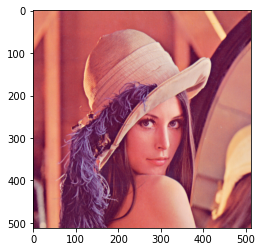

In [403]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color
from scipy.signal import convolve2d


# Load the image in grayscale
image_lena = cv2.imread('lena_std.tif')
image_lena_rgb = cv2.cvtColor(image_lena, cv2.COLOR_BGR2RGB)

plt.imshow(image_lena_rgb)
plt.show()

In [353]:
image_lena.shape

(512, 512, 3)

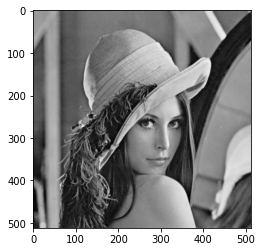

In [356]:
image_lena_gray = cv2.cvtColor(image_lena, cv2.COLOR_BGR2GRAY)
plt.imshow(image_lena_gray, cmap='gray')

In [ ]:
image_lena_gray

array([[162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       ...,
       [ 43,  43,  50, ..., 104, 100,  98],
       [ 44,  44,  55, ..., 104, 105, 108],
       [ 44,  44,  55, ..., 104, 105, 108]], dtype=uint8)

In [329]:
### Calcolo del negativo

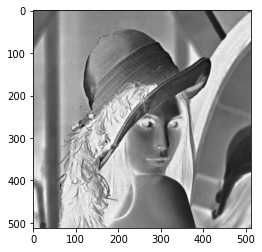

In [330]:
plt.imshow(1-256-image_lena_gray, cmap="gray")
plt.show()

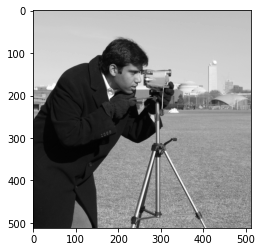

In [331]:
image = (data.camera())
plt.imshow(image, cmap='gray')

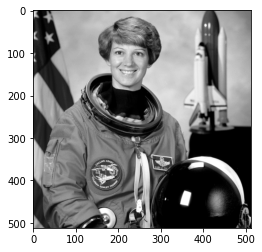

In [361]:
image = color.rgb2gray(data.astronaut())
plt.imshow(image, cmap='gray')

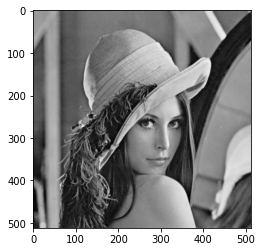

In [362]:
plt.imshow(image_lena_gray, cmap='gray')

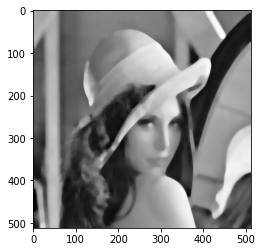

In [369]:
### Esempio di applicazione di un filtro mediano all'immagine

median_blur = cv2.medianBlur(image_lena_gray, 13)
plt.imshow(median_blur, cmap='gray')


Gaussian blurring is similar to average blurring, but instead of using a simple mean, we are now using a weighted mean, where neighborhood pixels that are closer to the central pixel contribute more “weight” to the average.

And as the name suggests, Gaussian smoothing is used to remove noise that approximately follows a Gaussian distribution.

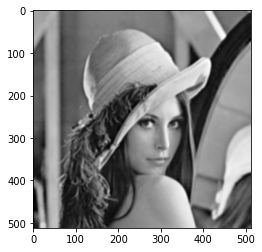

In [371]:
gaussian_blur = cv2.GaussianBlur(image_lena_gray, (5, 5), 110)
plt.imshow(gaussian_blur, cmap='gray')

/var/folders/x9/vltqjw210xs7pv7b0572tygw0000gn/T/ipykernel_6958/773770788.py:45: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 2)


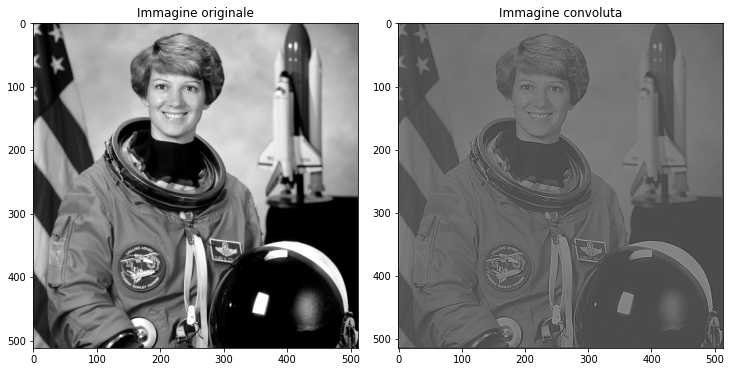

In [397]:
### https://numpy.org/doc/stable/reference/generated/numpy.convolve.html


# Kernel di esempio
kernel_identity = np.array([[0, 0, 0], 
                            [0, 1, 0], 
                            [0, 0, 0]])
kernel_edge_detection = np.array([[-1, -1, -1], 
                                  [-1, 8, -1], 
                                  [-1, -1, -1]])


#An average filter does exactly what you think it might do — 
# takes an area of pixels surrounding a central pixel, averages all these pixels together, 
# and replaces the central pixel with the average.
# By taking the average of the region surrounding a pixel, w
# e are smoothing it and replacing it with the value of its local neighborhood. 
# This allows us to reduce noise and the level of detail, simply by relying on the average.

kernel_box_blur = np.ones((3, 3)) / 9

#Sharpening is an image processing technique that enhances the details and edges in an image. In OpenCV, you can use convolution to apply sharpening filters to an image. One common method for image sharpening is using a kernel called the Laplacian kernel.
laplacian_kernel = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])
kernel_sharpen = np.array([[0, -1, 0], 
                           [-1, 5, -1], 
                           [0, -1, 0]])

# Scegli il kernel
kernel = kernel_sharpen  

# Applica la convoluzione usando 

processed_image = convolve2d(image, kernel)

# Mostra i risultati
plt.figure(figsize=(15, 15))

#plt.subplot(1, 3, 1)
plt.title("Kernel")
plt.imshow(kernel, cmap="gray")
#plt.colorbar()

plt.subplot(1, 3, 2)
plt.title("Immagine originale")
plt.imshow(image, cmap="gray")
#plt.colorbar()

plt.subplot(1, 3, 3)
plt.title("Immagine convoluta")
plt.imshow(processed_image, cmap="gray")
#plt.colorbar()

plt.tight_layout()
plt.show()


L'operatore calcola il gradiente della luminosità dell'immagine in ciascun punto, trovando la direzione lungo la quale si ha il massimo incremento possibile dal chiaro allo scuro, e la velocità con cui avviene il cambiamento lungo questa direzione. Il risultato ottenuto fornisce una misura di quanto "bruscamente" oppure "gradualmente" l'immagine cambia in quel punto, e quindi della probabilità che quella parte di immagine rappresenti un contorno, e fornisce anche un'indicazione del probabile orientamento di quel contorno. 

In termini matematici, il gradiente di una funzione di due variabili (qui la funzione luminosità dell'immagine) è in ciascun punto dell'immagine un vettore bidimensionale le cui componenti sono le derivate del valore della luminosità in direzione orizzontale e verticale. In ciascun punto dell'immagine questo vettore gradiente punta nella direzione del massimo possibile aumento di luminosità, e la lunghezza del vettore corrisponde alla rapidità con cui la luminosità cambia spostandosi in quella direzione. Ciò significa che nelle zone dell'immagine in cui la luminosità è costante l'operatore di Sobel ha valore zero, mentre nei punti posti sui contorni è un vettore orientato attraverso il contorno, che punta nella direzione in cui si passa da valori di scuro a valori di chiaro.



In [404]:
data.camera()

array([[200, 200, 200, ..., 189, 190, 190],
       [200, 199, 199, ..., 190, 190, 190],
       [199, 199, 199, ..., 190, 190, 190],
       ...,
       [ 25,  25,  27, ..., 139, 122, 147],
       [ 25,  25,  26, ..., 158, 141, 168],
       [ 25,  25,  27, ..., 151, 152, 149]], dtype=uint8)

In [408]:
variabile = 'ciao'
print(variabile)

ciao


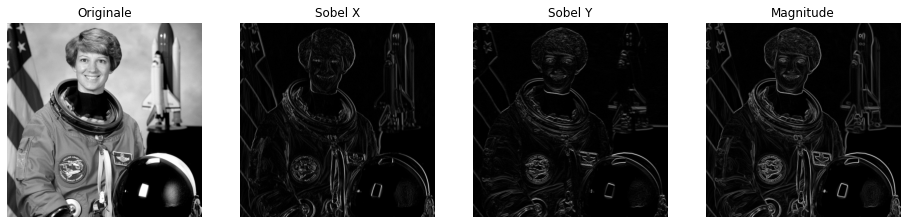

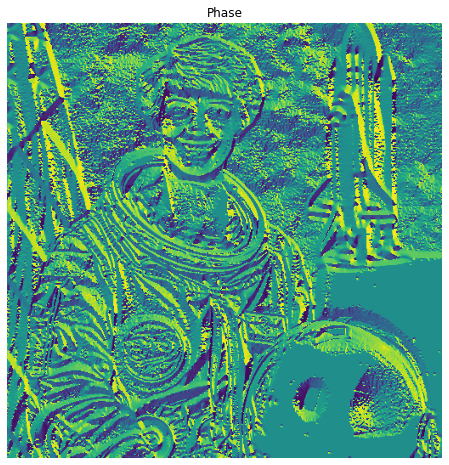

In [405]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

image = cv2.cvtColor(data.astronaut(), cv2.COLOR_RGB2GRAY)
# Definizione dei kernel di Sobel
sobel_x_kernel = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])
sobel_y_kernel = np.array([[-1, -2, -1],
                           [ 0,  0,  0],
                           [ 1,  2,  1]])

# Applica la convoluzione manuale con i kernel di Sobel
sobel_x = convolve2d(image, sobel_x_kernel, mode='same', boundary='symm')
sobel_y = convolve2d(image, sobel_y_kernel, mode='same', boundary='symm')

# Calcola la magnitudine del gradiente
magnitude_ = np.sqrt(sobel_x**2 + sobel_y**2)
magnitude = (magnitude_ / magnitude_.max() * 255).astype(np.uint8)  # Normalizza tra 0 e 255

# Calcola la fase del gradiente
phase = np.arctan2(sobel_y, sobel_x)  # Fase = Direzione del gradiente: in radianti
phase_normalized = (phase + np.pi) / (2 * np.pi) * 255  # Normalizza tra 0 e 255

# Mostra i risultati
plt.figure(figsize=(16, 8))

plt.subplot(1, 4, 1)
plt.title("Originale")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("Sobel X")
plt.imshow(np.abs(sobel_x), cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title("Sobel Y")
plt.imshow(np.abs(sobel_y), cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("Magnitude")
plt.imshow(magnitude, cmap='gray')
plt.axis('off')

plt.figure(figsize=(8, 8))
plt.title("Phase")
plt.imshow(phase) 
plt.axis('off')

plt.show()


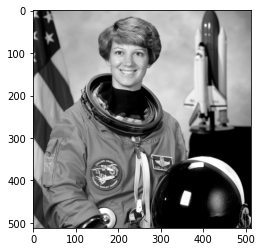

In [413]:
plt.imshow(image, cmap='gray')

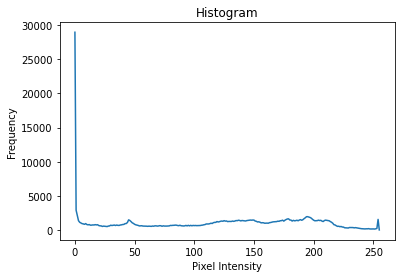

In [411]:
### Histogram processing


from matplotlib import pyplot as plt

# Calculate the histogram
histogram = cv2.calcHist([image], [0], None, [256], [0, 255])

# Plot the histogram
plt.plot(histogram)
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


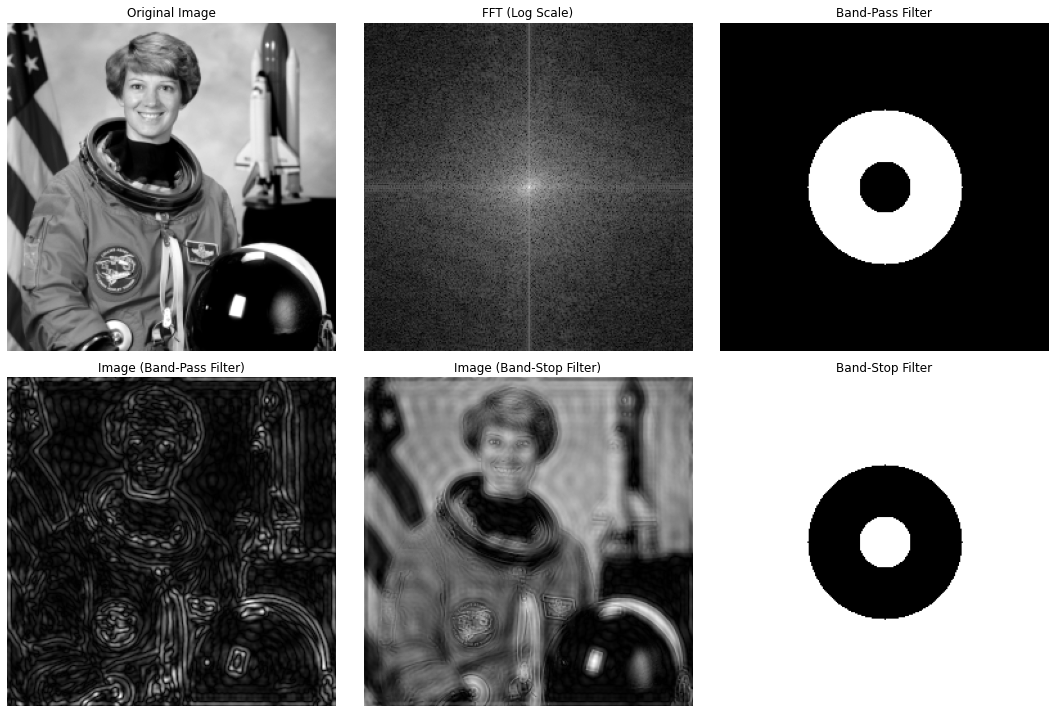

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color
from skimage.transform import resize
from scipy.fftpack import fftshift, fft2, ifft2

# Funzione per creare un filtro passa banda
def band_pass_filter(shape, low_radius, high_radius):
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    Y, X = np.ogrid[:rows, :cols]
    distance = np.sqrt((X - center_col)**2 + (Y - center_row)**2)
    mask = (distance >= low_radius) & (distance <= high_radius)
    return mask

# Funzione per creare un filtro blocca banda
def band_stop_filter(shape, low_radius, high_radius):
    return ~band_pass_filter(shape, low_radius, high_radius)

# Caricamento immagine e preparazione
image = color.rgb2gray(data.astronaut())
image = resize(image, (256, 256))  # Ridimensiona per semplicità
image_fft = fft2(image)
image_fft_shifted = fftshift(image_fft)  # Shift per portare lo zero al centro

# Parametri del filtro
low_radius = 20
high_radius = 60

# Creazione dei filtri
pass_band = band_pass_filter(image.shape, low_radius, high_radius)
stop_band = band_stop_filter(image.shape, low_radius, high_radius)

# Applicazione dei filtri nel dominio di Fourier
filtered_fft_pass = image_fft_shifted * pass_band
filtered_fft_stop = image_fft_shifted * stop_band

# Inverse FFT per ottenere le immagini filtrate
image_filtered_pass = np.abs(ifft2(fftshift(filtered_fft_pass)))
image_filtered_stop = np.abs(ifft2(fftshift(filtered_fft_stop)))

# Visualizzazione dei risultati
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 1].imshow(np.log1p(np.abs(image_fft_shifted)), cmap='gray')
axes[0, 1].set_title("FFT (Log Scale)")
axes[0, 2].imshow(pass_band, cmap='gray')
axes[0, 2].set_title("Band-Pass Filter")

axes[1, 0].imshow(image_filtered_pass, cmap='gray')
axes[1, 0].set_title("Image (Band-Pass Filter)")
axes[1, 1].imshow(image_filtered_stop, cmap='gray')
axes[1, 1].set_title("Image (Band-Stop Filter)")
axes[1, 2].imshow(stop_band, cmap='gray')
axes[1, 2].set_title("Band-Stop Filter")

for ax in axes.flat:
    ax.axis("off")

plt.tight_layout()
plt.show()


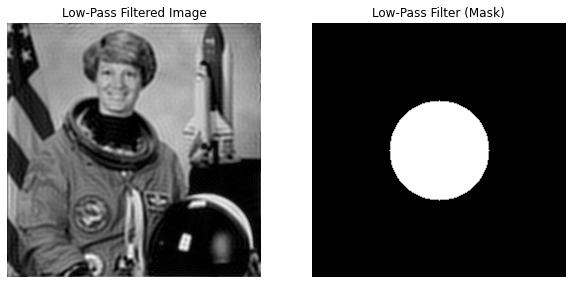

In [126]:
def low_pass_filter(shape, radius):
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    Y, X = np.ogrid[:rows, :cols]
    distance = np.sqrt((X - center_col)**2 + (Y - center_row)**2)
    mask = distance <= radius
    return mask

# Creazione e applicazione del filtro passa basso
low_pass = low_pass_filter(image.shape, 50)
filtered_fft_low = image_fft_shifted * low_pass
image_filtered_low = np.abs(ifft2(fftshift(filtered_fft_low)))

# Visualizzazione
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Low-Pass Filtered Image")
plt.imshow(image_filtered_low, cmap='gray')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Low-Pass Filter (Mask)")
plt.imshow(low_pass, cmap='gray')
plt.axis("off")
plt.show()



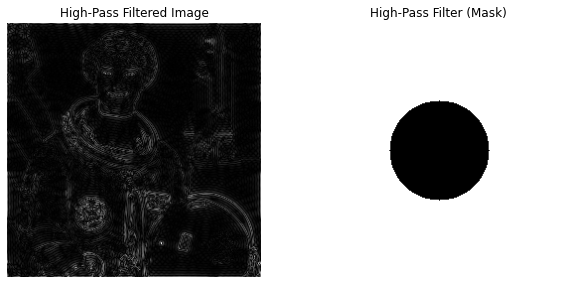

In [125]:
def high_pass_filter(shape, radius):
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    Y, X = np.ogrid[:rows, :cols]
    distance = np.sqrt((X - center_col)**2 + (Y - center_row)**2)
    mask = distance > radius
    return mask

# Creazione e applicazione del filtro passa alto
high_pass = high_pass_filter(image.shape, 50)
filtered_fft_high = image_fft_shifted * high_pass
image_filtered_high = np.abs(ifft2(fftshift(filtered_fft_high)))

# Visualizzazione
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("High-Pass Filtered Image")
plt.imshow(image_filtered_high, cmap='gray')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("High-Pass Filter (Mask)")
plt.imshow(high_pass, cmap='gray')
plt.axis("off")
plt.show()


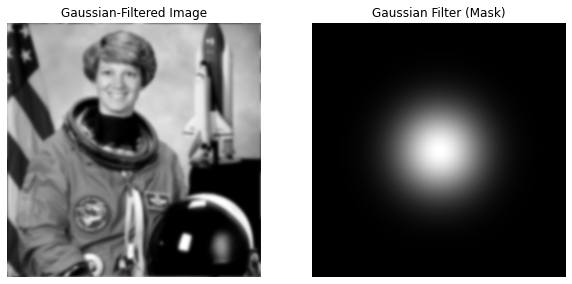

In [123]:
def gaussian_low_pass_filter(shape, sigma):
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    Y, X = np.ogrid[:rows, :cols]
    distance = np.sqrt((X - center_col)**2 + (Y - center_row)**2)
    gaussian_mask = np.exp(-(distance**2) / (2 * (sigma**2)))
    return gaussian_mask

# Creazione e applicazione del filtro gaussiano
gaussian_filter = gaussian_low_pass_filter(image.shape, sigma=30)
filtered_fft_gaussian = image_fft_shifted * gaussian_filter
image_filtered_gaussian = np.abs(ifft2(fftshift(filtered_fft_gaussian)))

# Visualizzazioneaaa
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Gaussian-Filtered Image")
plt.imshow(image_filtered_gaussian, cmap='gray')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Gaussian Filter (Mask)")
plt.imshow(gaussian_filter, cmap='gray')
plt.axis("off")
plt.show()


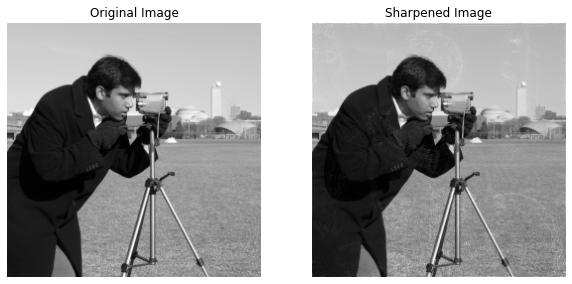

In [ ]:
# Creazione del filtro passa alto per sharpening
high_pass_sharp = high_pass_filter(image.shape, 50)
filtered_fft_sharp = image_fft_shifted * high_pass_sharp
image_filtered_sharp = np.abs(ifft2(fftshift(filtered_fft_sharp)))

# Creazione immagine sharpened (originale + filtro passa alto)
sharpened_image = image + 0.5 * image_filtered_sharp

# Visualizzazione
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Sharpened Image")
plt.imshow(sharpened_image, cmap='gray')
plt.axis("off")
plt.show()


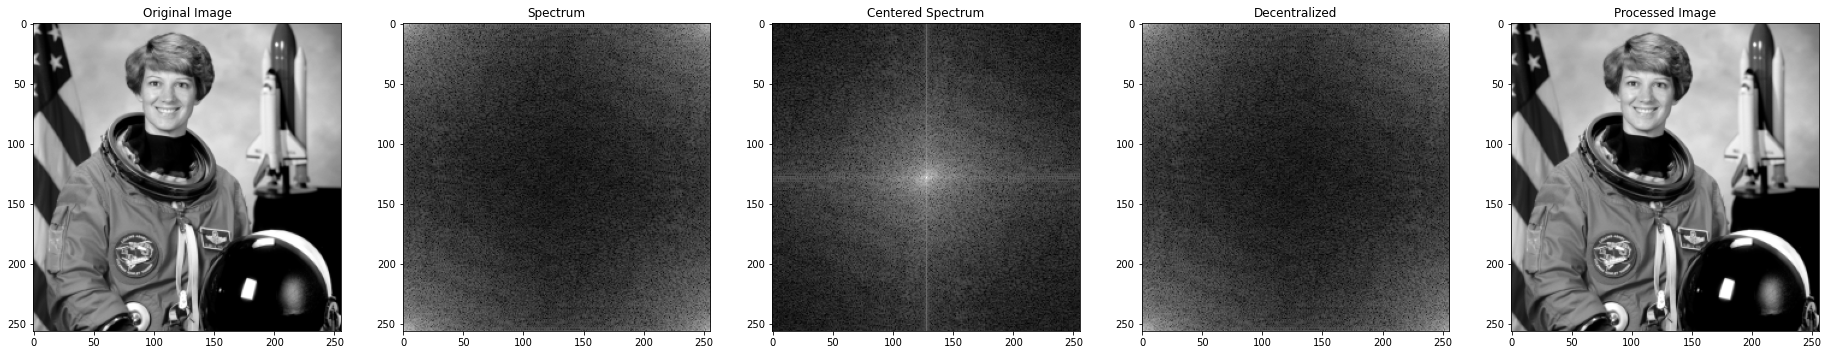

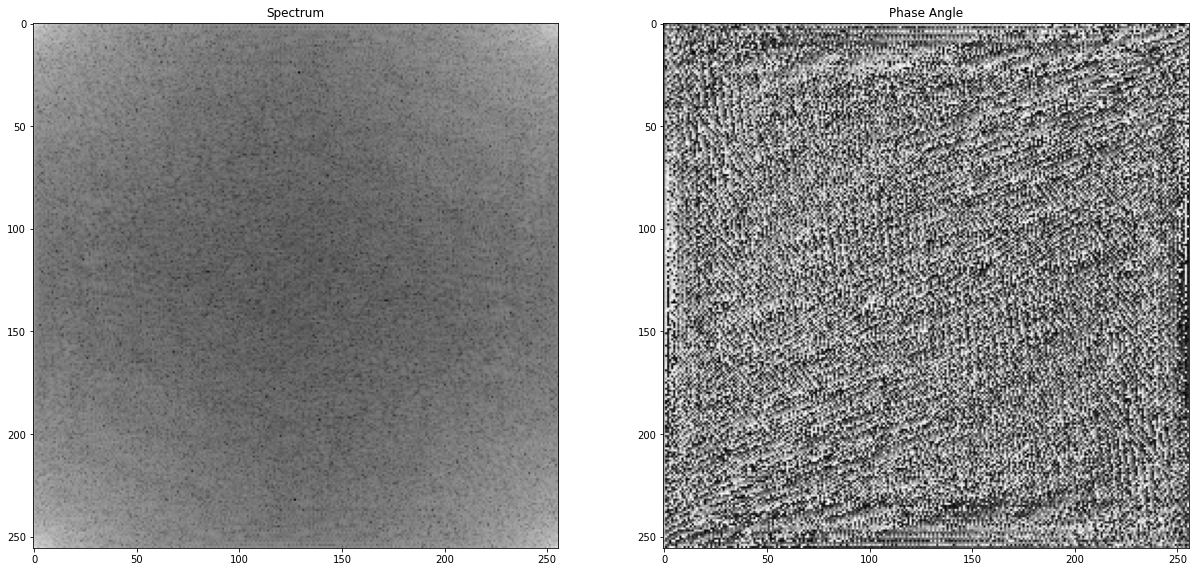

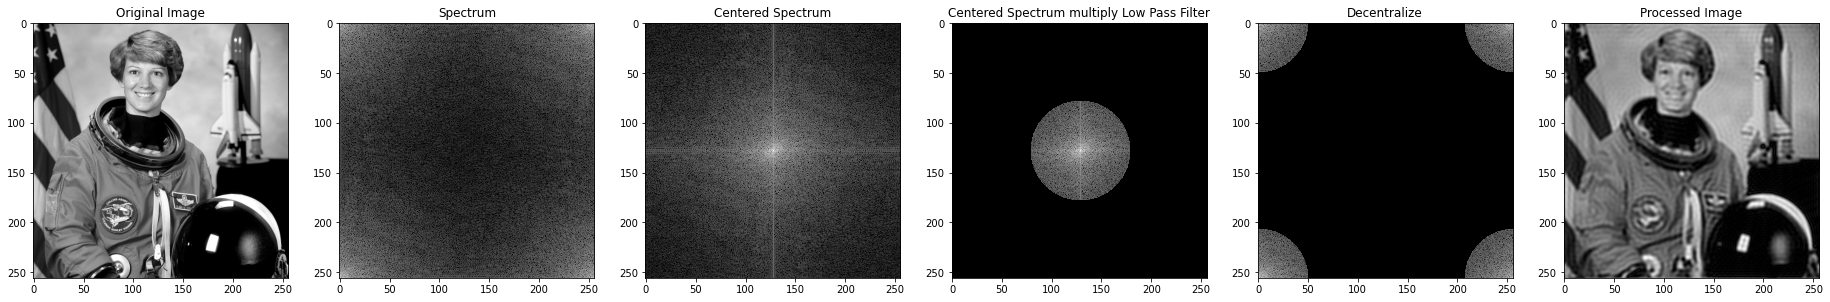

In [21]:

# Importing libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from math import exp

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

# Load an image
img_c1 = image

# Perform Fourier Transform
img_c2 = np.fft.fft2(img_c1)

# Shift the zero frequency component to the center
img_c3 = np.fft.fftshift(img_c2)

# Shift back to original position
img_c4 = np.fft.ifftshift(img_c3)

# Inverse Fourier Transform
img_c5 = np.fft.ifft2(img_c4)

# Plotting
plt.subplot(151), plt.imshow(img_c1, "gray"), plt.title("Original Image")
plt.subplot(152), plt.imshow(np.log(1+np.abs(img_c2)), "gray"), plt.title("Spectrum")
plt.subplot(153), plt.imshow(np.log(1+np.abs(img_c3)), "gray"), plt.title("Centered Spectrum")
plt.subplot(154), plt.imshow(np.log(1+np.abs(img_c4)), "gray"), plt.title("Decentralized")
plt.subplot(155), plt.imshow(np.abs(img_c5), "gray"), plt.title("Processed Image")

plt.show()

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

# Load another image
img = image

# Perform Fourier Transform
original = np.fft.fft2(img)

# Plotting spectrum and phase angle
plt.subplot(131), plt.imshow(np.log(np.abs(original)), "gray"), plt.title("Spectrum")
plt.subplot(132), plt.imshow(np.angle(original), "gray"), plt.title("Phase Angle")
plt.show()

# Function to calculate distance between two points
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

# Ideal low-pass filter function
def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

# Ideal high-pass filter function
def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

# Butterworth low-pass filter function
def butterworthLP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

# Butterworth high-pass filter function
def butterworthHP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

# Gaussian low-pass filter function
def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

# Gaussian high-pass filter function
def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

# Applying low-pass filter on the image
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(161), plt.imshow(img, "gray"), plt.title("Original Image")
plt.subplot(162), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")
center = np.fft.fftshift(original)
plt.subplot(163), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")
LowPassCenter = center * idealFilterLP(50,img.shape)
plt.subplot(164), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")
LowPass = np.fft.ifftshift(LowPassCenter)
plt.subplot(165), plt.imshow(np.log(1+np.abs(LowPass)), "gray"), plt.title("Decentralize")
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(166), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image")
plt.show()


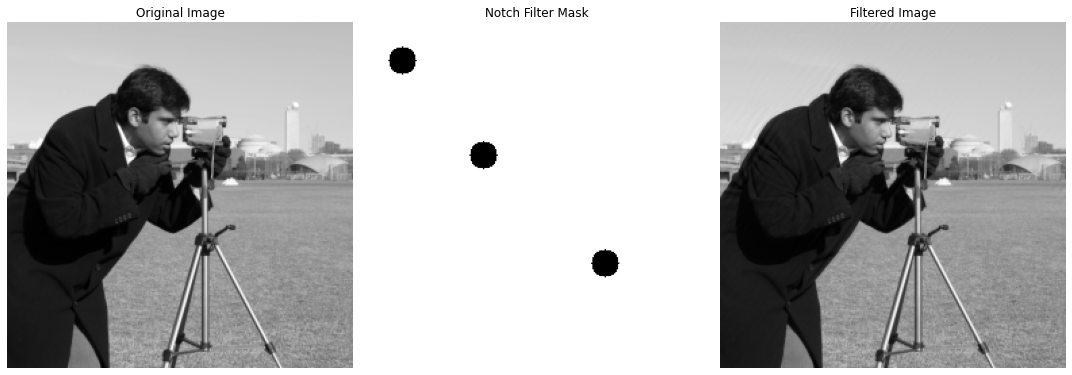

In [115]:
def notch_filter(shape, center, radius):
    """
    Crea un filtro Notch centrato su una determinata frequenza.
    
    Args:
        shape (tuple): Dimensioni dell'immagine (rows, cols).
        center (tuple): Coordinate del centro della frequenza da sopprimere.
        radius (int): Raggio della banda da sopprimere.
    
    Returns:
        numpy.ndarray: Maschera del filtro Notch.
    """
    rows, cols = shape
    center_row, center_col = center
    Y, X = np.ogrid[:rows, :cols]
    distance = np.sqrt((X - center_col)**2 + (Y - center_row)**2)
    mask = distance > radius
    return mask

def apply_notch_filter(image, centers, radius):
    """
    Applica un filtro Notch a un'immagine, rimuovendo frequenze specifiche.
    
    Args:
        image (numpy.ndarray): Immagine in input (2D).
        centers (list): Lista di coordinate (row, col) delle frequenze da sopprimere.
        radius (int): Raggio delle bande da sopprimere.
    
    Returns:
        numpy.ndarray: Immagine filtrata.
    """
    # Trasformata di Fourier
    image_fft = fft2(image)
    image_fft_shifted = fftshift(image_fft)
    
    # Creazione del filtro Notch (inizialmente tutti i valori sono 1)
    notch_mask = np.ones_like(image, dtype=float)
    
    # Applicazione dei notch per ciascun centro specificato
    for center in centers:
        notch_mask *= notch_filter(image.shape, center, radius)
    
    # Applicazione del filtro e trasformata inversa
    filtered_fft = image_fft_shifted * (notch_mask)
    filtered_image = np.abs(ifft2(fftshift(filtered_fft)))
    
    return filtered_image, notch_mask

# Caricamento immagine e impostazione parametri
image = (data.camera())  # Immagine di esempio
image = resize(image, (256, 256))     # Ridimensiona per semplicità

# Specifica dei centri di interferenza nel dominio delle frequenze
centers = [(128 + 50, 128 + 50), (128 - 30, 128 - 40), (128 - 100, 128 - 100)]  # Frequenze da sopprimere
radius = 10  # Raggio del filtro Notch

# Applicazione del filtro Notch
filtered_image, notch_mask = apply_notch_filter(image, centers, radius)

# Visualizzazione dei risultati
plt.figure(figsize=(15, 7))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Notch Filter Mask")
plt.imshow(notch_mask, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Filtered Image")
plt.imshow(filtered_image, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()


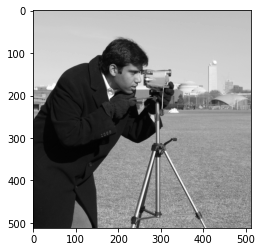

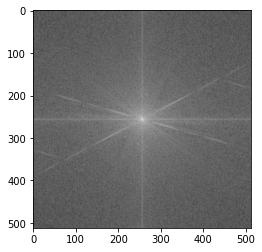

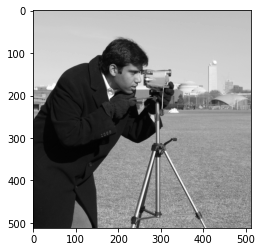

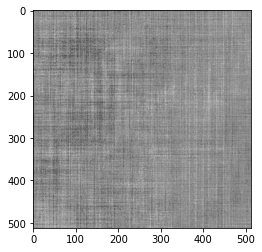

In [101]:
complex_kspace_image = np.fft.fft2(data.camera())
fftshift_kspace = np.fft.fftshift(complex_kspace_image)
plt.imshow(data.camera(), cmap='gray')
plt.show()
plt.imshow(np.log(np.abs(fftshift_kspace)), cmap='gray')
plt.show()
ifft_image = np.fft.ifft2(np.fft.ifftshift(fftshift_kspace))
plt.imshow((np.abs(ifft_image)), cmap='gray')

ifft_image = np.fft.ifft2(np.fft.ifftshift(fftshift_kspace))
plt.imshow((np.abs(ifft_image)), cmap='gray')

plt.show()

plt.imshow(data.camera()-np.abs(ifft_image), cmap='gray')